In [1]:
# https://python-course.eu/machine-learning/artificial-datasets-with-scikit-learn.php

In [2]:
import numpy as np
import pandas as pd


cities = ['Berlin', 'Frankfurt', 'Hamburg', 
          'Nuremberg', 'Munich', 'Stuttgart',
          'Hanover', 'Saarbruecken', 'Cologne',
          'Constance', 'Freiburg', 'Karlsruhe'
         ]

n= len(cities)
data = {'Temperature': np.random.normal(24, 3, n),
        'Humidity': np.random.normal(78, 2.5, n),
        'Wind': np.random.normal(15, 4, n)
       }
df = pd.DataFrame(data=data, index=cities)
df

,Temperature,Humidity,Wind
Berlin,28.450809,82.910251,12.336320
Frankfurt,18.642807,72.591317,11.964469
Hamburg,22.053662,77.634819,17.076664
Nuremberg,19.492075,75.607799,16.430802
Munich,21.877531,75.929902,12.539618
Stuttgart,25.258455,80.334576,19.742871
Hanover,27.490319,79.925116,12.823126
Saarbruecken,20.977291,80.541952,8.856794
Cologne,29.647704,76.343089,18.727082
Constance,25.188475,76.522043,20.181506


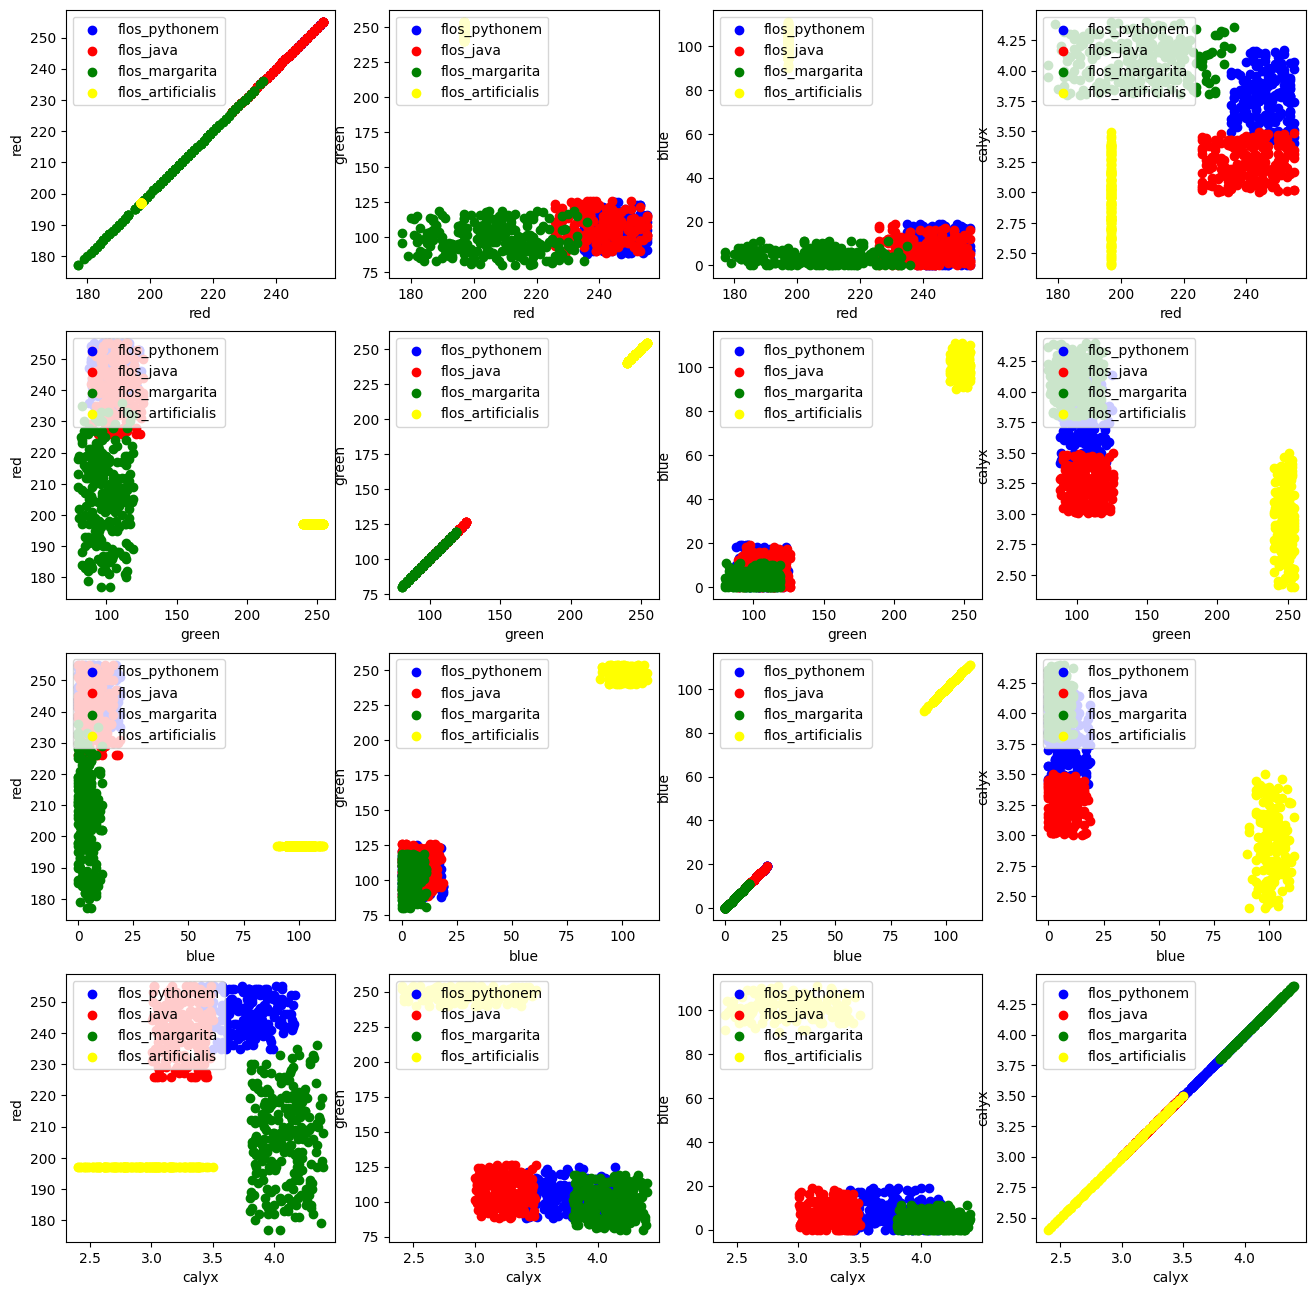

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

def truncated_normal_floats(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num)

def truncated_normal_ints(mean=0, sd=1, low=0, upp=10, num=100):
    res = truncated_normal(mean=mean, sd=sd, low=low, upp=upp)
    return res.rvs(num).astype(np.uint8)

# number of items for each flower class:
number_of_items_per_class = [190, 205, 230, 170]
flowers = {}
# flos Pythonem:
number_of_items = number_of_items_per_class[0]
reds = truncated_normal_ints(mean=254, sd=18, low=235, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                             num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=15, low=0, upp=20,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(3.8, 0.3, 3.4, 4.2,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_pythonem"] = data

# flos Java:
number_of_items = number_of_items_per_class[1]
reds = truncated_normal_ints(mean=245, sd=17, low=226, upp=256,
                             num=number_of_items)
greens = truncated_normal_ints(mean=107, sd=11, low=88, upp=127,
                             num=number_of_items)
blues = truncated_normal_ints(mean=0, sd=10, low=0, upp=20,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(3.3, 0.3, 3.0, 3.5,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_java"] = data

# flos Java:
number_of_items = number_of_items_per_class[2]
reds = truncated_normal_ints(mean=206, sd=17, low=175, upp=238,
                             num=number_of_items)
greens = truncated_normal_ints(mean=99, sd=14, low=80, upp=120,
                             num=number_of_items)
blues = truncated_normal_ints(mean=1, sd=5, low=0, upp=12,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(4.1, 0.3, 3.8, 4.4,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_margarita"] = data

# flos artificialis:
number_of_items = number_of_items_per_class[3]
reds = truncated_normal_ints(mean=255, sd=8, low=2245, upp=2255,
                             num=number_of_items)
greens = truncated_normal_ints(mean=254, sd=10, low=240, upp=255,
                             num=number_of_items)
blues = truncated_normal_ints(mean=101, sd=5, low=90, upp=112,
                             num=number_of_items)
calyx_dia = truncated_normal_floats(2.9, 0.4, 2.4, 3.5,
                             num=number_of_items)
data = np.column_stack((reds, greens, blues, calyx_dia))
flowers["flos_artificialis"] = data


data = np.concatenate((flowers["flos_pythonem"], 
                      flowers["flos_java"],
                      flowers["flos_margarita"],
                      flowers["flos_artificialis"]
                     ), axis=0)

# assigning the labels
target = np.zeros(sum(number_of_items_per_class)) # 4 flowers
previous_end = 0
for i in range(1, 5):
    num = number_of_items_per_class[i-1]
    beg = previous_end
    target[beg: beg + num] += i
    previous_end = beg + num
    
conc_data = np.concatenate((data, target.reshape(target.shape[0], 1)),
                           axis=1)

np.savetxt("./data/strange_flowers.txt", conc_data, fmt="%2.2f",)
import matplotlib.pyplot as plt

target_names = list(flowers.keys())
feature_names = ['red', 'green', 'blue', 'calyx']
n = 4
fig, ax = plt.subplots(n, n, figsize=(16, 16))

colors = ['blue', 'red', 'green', 'yellow']

for x in range(n):
    for y in range(n):
        xname = feature_names[x]
        yname = feature_names[y]
        for color_ind in range(1, len(target_names)+1):
            ax[x, y].scatter(data[target==color_ind, x], 
                             data[target==color_ind, y],
                             label=target_names[color_ind-1],
                             c=colors[color_ind-1])

        ax[x, y].set_xlabel(xname)
        ax[x, y].set_ylabel(yname)
        ax[x, y].legend(loc='upper left')


plt.show() # scatter of strange flowers data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_classes = 4
data, labels = make_blobs(n_samples=1000, 
                          centers=n_classes, 
                          random_state=100)

labels[:7]

array([1, 3, 1, 3, 1, 3, 2])

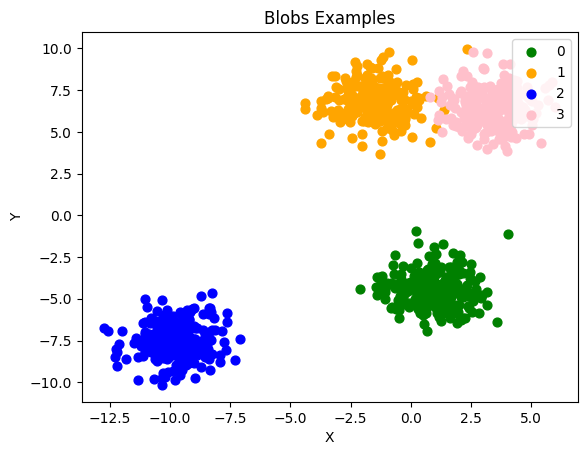

In [2]:
# some blobs
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue', "pink")
for label in range(n_classes):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

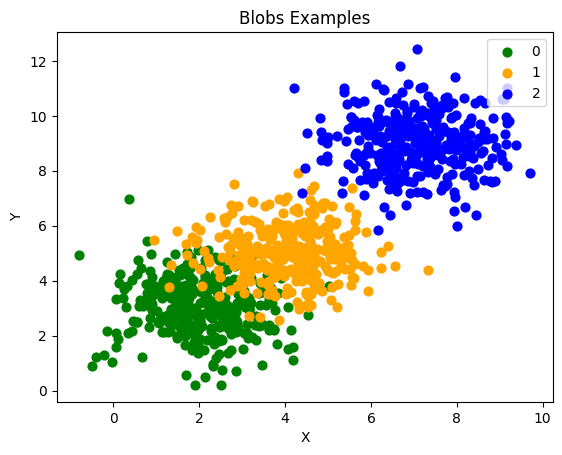

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

centers = [[2, 3], [4, 5], [7, 9]]
data, labels = make_blobs(n_samples=1000, 
                          centers=np.array(centers),
                          random_state=1)

labels[:7]

# some more blobs
fig, ax = plt.subplots()

colours = ('green', 'orange', 'blue')
for label in range(len(centers)):
    ax.scatter(x=data[labels==label, 0], 
               y=data[labels==label, 1], 
               c=colours[label], 
               s=40, 
               label=label)

ax.set(xlabel='X',
       ylabel='Y',
       title='Blobs Examples')


ax.legend(loc='upper right')

In [4]:
labels = labels.reshape((labels.shape[0],1))
all_data = np.concatenate((data, labels), axis=1)
all_data[:7]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ]])

In [5]:
np.savetxt("squirrels.txt", 
           all_data,
           fmt=['%.3f', '%.3f', '%1d'])
all_data[:10]

array([[ 1.72415394,  4.22895559,  0.        ],
       [ 4.16466507,  5.77817418,  1.        ],
       [ 4.51441156,  4.98274913,  1.        ],
       [ 1.49102772,  2.83351405,  0.        ],
       [ 6.0386362 ,  7.57298437,  2.        ],
       [ 5.61044976,  9.83428321,  2.        ],
       [ 5.69202866, 10.47239631,  2.        ],
       [ 6.14017298,  8.56209179,  2.        ],
       [ 2.97620068,  5.56776474,  1.        ],
       [ 8.27980017,  8.54824406,  2.        ]])

In [6]:
file_data = np.loadtxt("squirrels.txt")

data = file_data[:,:-1]
labels = file_data[:,2:]

labels = labels.reshape((labels.shape[0]))

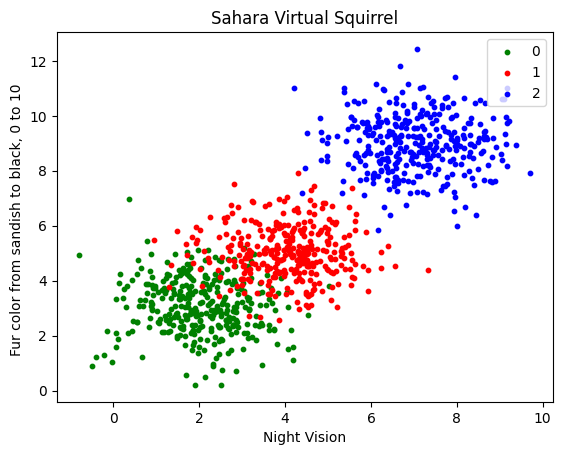

In [7]:
# sahara squirrel dataset graph
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'cyan')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

ax.set(xlabel='Night Vision',
       ylabel='Fur color from sandish to black, 0 to 10 ',
       title='Sahara Virtual Squirrel')


ax.legend(loc='upper right')

In [8]:
from sklearn.model_selection import train_test_split

data_sets = train_test_split(data, 
                       labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42 # garantees same output for every run
                      )

train_data, test_data, train_labels, test_labels = data_sets
# import model
from sklearn.neighbors import KNeighborsClassifier

# create classifier
knn = KNeighborsClassifier(n_neighbors=8)

# train
knn.fit(train_data, train_labels)

# test on test data:
calculated_labels = knn.predict(test_data)
calculated_labels

array([2., 0., 1., 1., 0., 1., 2., 2., 2., 2., 0., 1., 0., 0., 1., 0., 1.,
       2., 0., 0., 1., 2., 1., 2., 2., 1., 2., 0., 0., 2., 0., 2., 2., 0.,
       0., 2., 0., 0., 0., 1., 0., 1., 1., 2., 0., 2., 1., 2., 1., 0., 2.,
       1., 1., 0., 1., 2., 1., 0., 0., 2., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 2., 1., 2., 0., 2., 1.,
       1., 0., 2., 2., 2., 0., 1., 1., 1., 2., 2., 0., 2., 2., 2., 2., 0.,
       0., 1., 1., 1., 2., 1., 1., 1., 0., 2., 1., 2., 0., 0., 1., 0., 1.,
       0., 2., 2., 2., 1., 1., 1., 0., 2., 1., 2., 2., 1., 2., 0., 2., 0.,
       0., 1., 0., 2., 2., 0., 0., 1., 2., 1., 2., 0., 0., 2., 2., 0., 0.,
       1., 2., 1., 2., 0., 0., 1., 2., 1., 0., 2., 2., 0., 2., 0., 0., 2.,
       1., 0., 0., 0., 0., 2., 2., 1., 0., 2., 2., 1., 2., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 2., 0., 2., 2., 1., 1., 1., 2.])

In [9]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(test_labels, calculated_labels))

Accuracy: 0.97


In [10]:
import numpy as np


import sklearn.datasets as ds
data, labels = ds.make_moons(n_samples=150, 
                             shuffle=True, 
                             noise=0.19, 
                             random_state=None)

data += np.array(-np.ndarray.min(data[:,0]), 
                 -np.ndarray.min(data[:,1]))

np.ndarray.min(data[:,0]), np.ndarray.min(data[:,1])

(0.0, 0.774848801624672)

[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Moons')]

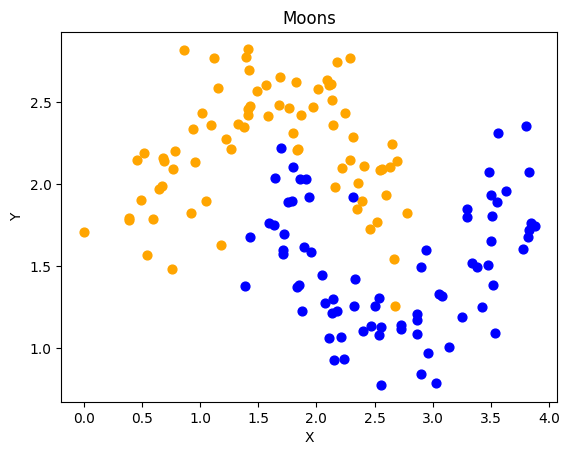

In [11]:
# moon graphs
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(data[labels==0, 0], data[labels==0, 1], 
               c='orange', s=40, label='oranges')
ax.scatter(data[labels==1, 0], data[labels==1, 1], 
               c='blue', s=40, label='blues')

ax.set(xlabel='X',
       ylabel='Y',
       title='Moons')


#ax.legend(loc='upper right');